In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ee/d3/67ccdab9d2756f8b30b0669015840cd5fdb5f062a2d621d67f033cf3dd54/wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.6 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pymorphy3

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for pymorphy3 from https://files.pythonhosted.org/packages/fc/9b/3480f9ba338b1adc6585978c9a8febc81933e9bb240c6cc093ca4b58021c/pymorphy3-2.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for dawg2-python>=0.8.0 from https://files.pythonhosted.org/packages/84/3b/7fb4c1a8df59cb80f5f7ecb9646280e000f9ba2ccff8710205dc9aa4604f/dawg2_python-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for pymorphy3-dicts-ru from https://files.pythonhosted.org/packages/b0/67/469e9e52d046863f5959928794d3067d455a77f580bf4a662630a43eb426/pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.2 MB/s eta 0:00:00 0:00:010:00:01
  Consider adding this directory to PATH or, if you pre

In [2]:
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     /home/b65335f9-5f31-415d-b02f-
[nltk_data]     bd9beb541dbd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/b65335f9-5f31-415d-b02f-
[nltk_data]     bd9beb541dbd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pymorphy3
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
stop_words = stopwords.words('russian')
morph = pymorphy3.MorphAnalyzer()

In [5]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    :param raw_text: исходная текстовая строка
    """
    # Разбиение на сслова при помощи пробела
    words = raw_text.split()
    # Подготовка регулярного выражения для фильтрации символов
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # Удаление знаков препинания
    stripped = [re_punc.sub('', w) for w in words]
    # Приведение всех слов к нижнему регистру
    words_lower = [w.lower() for w in stripped]
    # Удаление оставшихся токенов, которые не являются буквами
    words_alpha = [word for word in words_lower if word.isalpha()]
    # Удаление стоп-слов    
    words_stop = [w for w in words_alpha if not w in stop_words]
    # Лемматизация    
    tokens = [morph.parse(token)[0].normal_form for token in words_stop]
    # Удалим короткие токены
    tokens = [word for word in tokens if len(word) > 1]

    return tokens

### Посты

In [6]:
df_posts = pd.read_csv('posts_politics.csv', index_col = 0)
df_posts.head()

,post_id,date,post_text
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...
1,2192593,2025-05-11,NaN
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...


In [7]:
df_posts.shape

(1000, 3)

In [8]:
df_posts.dropna(inplace=True)
df_posts.shape

(736, 3)

In [9]:
# применяем функцию к датафрейму с помощью метода .apply()
tokenized= df_posts['post_text'].apply(tokenize_text)

In [10]:
# добавляем новую колонку в исходный датафрейм
df_posts = df_posts.assign(tokenized=tokenized)
df_posts.head()

,post_id,date,post_text,tokenized
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"[сми, взбудоражить, предложение, путин, провес..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"[wsj, сообщить, признание, трамп, сложность, р..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"[ездить, зеленский, допинг, войти, купе, старм..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"[зеленский, ответить, предложение, путин, пере..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"[фицо, ответить, критика, каллас, изз, визит, ..."


In [16]:
df_posts.to_csv('posts_tokenised.csv')

In [11]:
words_list_posts = list(df_posts['tokenized'])

In [12]:
all_words_posts = np.concatenate(words_list_posts)

In [13]:
all_words_freq_posts = FreqDist(all_words_posts)
print("Наиболлее популярные слова: ", all_words_freq_posts.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_posts.keys()))

Наиболлее популярные слова:  [('украина', 1511), ('который', 1253), ('это', 1209), ('россия', 1188), ('сша', 874), ('год', 745), ('трамп', 717), ('украинский', 695), ('свой', 623), ('зеленский', 558), ('страна', 549), ('российский', 504), ('война', 496), ('наш', 479), ('военный', 473), ('президент', 465), ('киев', 439), ('заявить', 412), ('европа', 395), ('американский', 391), ('время', 355), ('тот', 340), ('стать', 339), ('сторона', 337), ('всу', 332), ('также', 328), ('день', 328), ('мир', 325), ('такой', 325), ('новый', 301), ('москва', 296), ('конфликт', 289), ('победа', 288), ('слово', 282), ('человек', 279), ('должный', 277), ('быть', 277), ('один', 274), ('территория', 273), ('весь', 271), ('говорить', 264), ('сам', 263), ('европейский', 261), ('сила', 258), ('мочь', 256), ('область', 247), ('глава', 239), ('переговоры', 237), ('этот', 237), ('первый', 236), ('путин', 235), ('вопрос', 235), ('власть', 234), ('другой', 233), ('самый', 232), ('русский', 232), ('май', 227), ('хотет

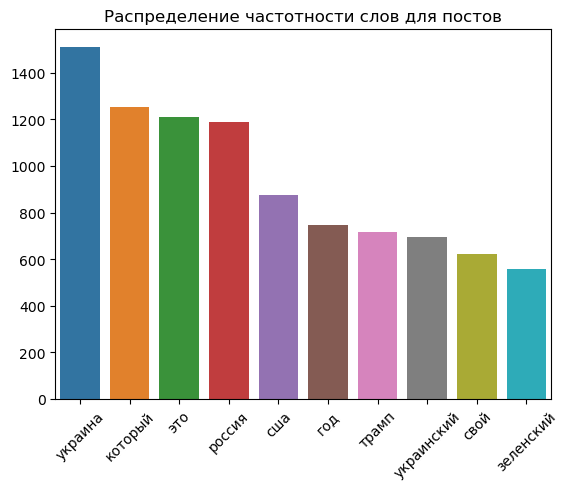

In [14]:
count, words = [], []
for w in all_words_freq_posts.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов')
plt.show()

In [15]:
df = pd.read_csv('posts_tokenised.csv',index_col=0)
df.head()

,post_id,date,post_text,tokenized
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз..."


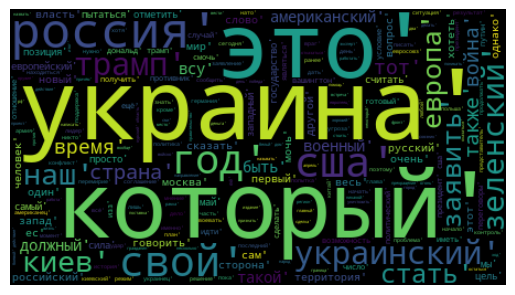

In [16]:
textt = ''.join(w for w in df.tokenized)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('neokolonialism.jpg')
plt.show()

In [17]:
stop_words_ex = ['который','это', 'год','тот','также','такой','этот','wsj' ]

In [18]:
def full_stop_words (text):
    words = [word for word in text if not word in stop_words_ex]
    return words

In [19]:
pure_tokens= df_posts['tokenized'].apply(full_stop_words)

In [20]:
# добавляем новую колонку в исходный датафрейм
df = df_posts.assign(pure_tokens=pure_tokens)
df.head()

,post_id,date,post_text,tokenized,pure_tokens
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"[сми, взбудоражить, предложение, путин, провес...","[сми, взбудоражить, предложение, путин, провес..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"[wsj, сообщить, признание, трамп, сложность, р...","[сообщить, признание, трамп, сложность, решени..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"[ездить, зеленский, допинг, войти, купе, старм...","[ездить, зеленский, допинг, войти, купе, старм..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"[зеленский, ответить, предложение, путин, пере...","[зеленский, ответить, предложение, путин, пере..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"[фицо, ответить, критика, каллас, изз, визит, ...","[фицо, ответить, критика, каллас, изз, визит, ..."


In [23]:
df.to_csv('posts_pure.csv')

In [21]:
words_list_posts = list(df['pure_tokens'])

In [22]:
all_words_posts = np.concatenate(words_list_posts)

In [23]:
all_words_freq_posts = FreqDist(all_words_posts)
print("Наиболлее популярные слова: ", all_words_freq_posts.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_posts.keys()))

Наиболлее популярные слова:  [('украина', 1511), ('россия', 1188), ('сша', 874), ('трамп', 717), ('украинский', 695), ('свой', 623), ('зеленский', 558), ('страна', 549), ('российский', 504), ('война', 496), ('наш', 479), ('военный', 473), ('президент', 465), ('киев', 439), ('заявить', 412), ('европа', 395), ('американский', 391), ('время', 355), ('стать', 339), ('сторона', 337), ('всу', 332), ('день', 328), ('мир', 325), ('новый', 301), ('москва', 296), ('конфликт', 289), ('победа', 288), ('слово', 282), ('человек', 279), ('должный', 277), ('быть', 277), ('один', 274), ('территория', 273), ('весь', 271), ('говорить', 264), ('сам', 263), ('европейский', 261), ('сила', 258), ('мочь', 256), ('область', 247), ('глава', 239), ('переговоры', 237), ('первый', 236), ('путин', 235), ('вопрос', 235), ('власть', 234), ('другой', 233), ('самый', 232), ('русский', 232), ('май', 227), ('хотеть', 216), ('ес', 215), ('режим', 212), ('действие', 206), ('дело', 204), ('рф', 203), ('войско', 202), ('очен

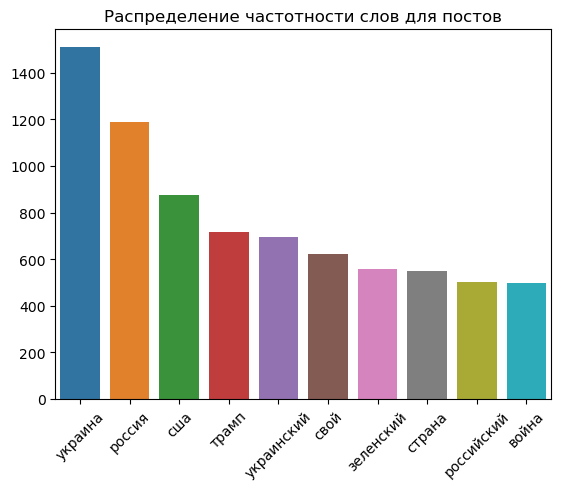

In [24]:
count, words = [], []
for w in all_words_freq_posts.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов')
plt.show()

In [ ]:
df.to_csv('pure_posts_tokens.csv')

In [25]:
df = pd.read_csv('posts_pure.csv',index_col = 0)
df.head()

,post_id,date,post_text,tokenized,pure_tokens
0,2192617,2025-05-11,СМИ взбудоражены предложением Путина провести ...,"['сми', 'взбудоражить', 'предложение', 'путин'...","['сми', 'взбудоражить', 'предложение', 'путин'..."
2,2192574,2025-05-11,WSJ сообщила о признании Трампом сложности в р...,"['wsj', 'сообщить', 'признание', 'трамп', 'сло...","['сообщить', 'признание', 'трамп', 'сложность'..."
3,2192555,2025-05-11,‼🇫🇷🇩🇪🇬🇧 Кто ж ездит к Зеленскому без допинга: ...,"['ездить', 'зеленский', 'допинг', 'войти', 'ку...","['ездить', 'зеленский', 'допинг', 'войти', 'ку..."
4,2192537,2025-05-11,Зеленский ответил на предложение Путина о пере...,"['зеленский', 'ответить', 'предложение', 'пути...","['зеленский', 'ответить', 'предложение', 'пути..."
6,2192508,2025-05-11,Фицо ответил на критику Каллас из-за визита в ...,"['фицо', 'ответить', 'критика', 'каллас', 'изз...","['фицо', 'ответить', 'критика', 'каллас', 'изз..."


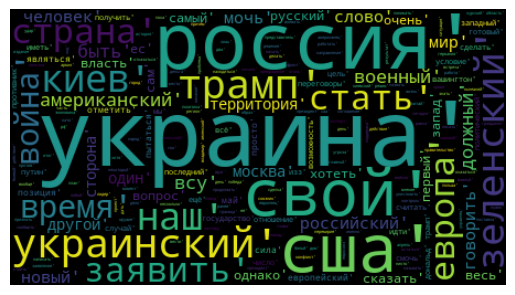

In [26]:
textt = ''.join(w for w in df.pure_tokens)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Комментарии

In [27]:
df_comments = pd.read_csv('comments_politics.csv', index_col = 0)
df_comments.head()

,post_id,comments_text
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту
1,2192593.0,NaN
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ..."


In [54]:
df_comments.shape

(5846, 2)

In [28]:
df_comments.dropna(inplace=True)
df_comments.shape

(4926, 2)

In [29]:
# применяем функцию к датафрейму с помощью метода .apply()
tokenized= df_comments['comments_text'].apply(tokenize_text)

In [30]:
# добавляем новую колонку в исходный датафрейм
df_comments = df_comments.assign(tokenized=tokenized)
df_comments.head()

,post_id,comments_text,tokenized
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту,"[единственный, способуничтожить, бандеровский,..."
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер...","[странно, раз, сказалотличный, переговоры, вел..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...,"[конечноести, террорист, продолжать, поставлят..."
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ...","[трамп, наскок, хотеть, решить, хотя, вряд, хо..."
5,2192555.0,Ужас .. Они там все торчат на кокаине. Не мудр...,"[ужас, торчать, кокаин, мудрено, торчок, убива..."


In [58]:
df_comments.to_csv('comments_tokenised.csv')

In [31]:
words_list_comments = list(df_comments['tokenized'])

In [32]:
all_words_comments = np.concatenate(words_list_comments)

In [33]:
all_words_freq_comments = FreqDist(all_words_comments)
print("Наиболлее популярные слова: ", all_words_freq_comments.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_comments.keys()))

Наиболлее популярные слова:  [('это', 921), ('россия', 566), ('украина', 489), ('свой', 477), ('наш', 398), ('мир', 363), ('страна', 290), ('который', 280), ('весь', 255), ('зеленский', 240), ('такой', 232), ('сша', 228), ('быть', 215), ('война', 213), ('хотеть', 210), ('этот', 205), ('сила', 205), ('всё', 201), ('русский', 197), ('новый', 195), ('мы', 192), ('год', 191), ('человек', 188), ('просто', 186), ('трамп', 182), ('ещё', 173), ('власть', 162), ('время', 160), ('должный', 159), ('земля', 158), ('народ', 154), ('пусть', 148), ('сам', 145), ('победа', 143), ('тот', 138), ('делать', 136), ('другой', 134), ('один', 133), ('свет', 132), ('запад', 128), ('говорить', 125), ('знать', 123), ('какой', 121), ('мочь', 118), ('идти', 117), ('никто', 115), ('эволюция', 112), ('военный', 111), ('деньга', 111), ('человечество', 110), ('европа', 109), ('оружие', 108), ('сказать', 106), ('фашист', 105), ('пора', 103), ('духовный', 102), ('путин', 101), ('кто', 99), ('день', 99), ('ближний', 96),

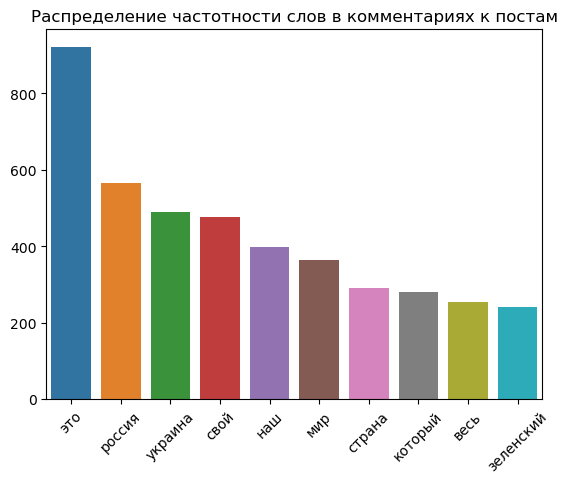

In [34]:
count, words = [], []
for w in all_words_freq_comments.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов в комментариях к постам')
plt.show()

In [35]:
df = pd.read_csv('comments_tokenised.csv',index_col=0)
df.head()

,post_id,comments_text,tokenized
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту,"['единственный', 'способуничтожить', 'бандеров..."
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер...","['странно', 'раз', 'сказалотличный', 'перегово..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...,"['конечноести', 'террорист', 'продолжать', 'по..."
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ...","['трамп', 'наскок', 'хотеть', 'решить', 'хотя'..."
5,2192555.0,Ужас .. Они там все торчат на кокаине. Не мудр...,"['ужас', 'торчать', 'кокаин', 'мудрено', 'торч..."


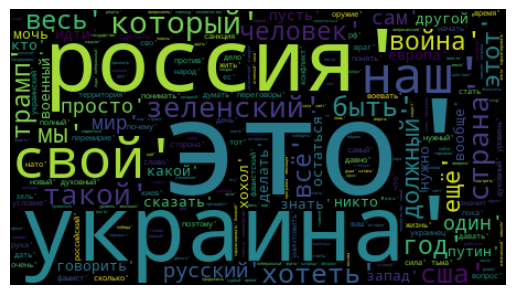

In [36]:
textt = ''.join(w for w in df.tokenized)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
stop_words_ext = ['который','это', 'такой','этот','год','какой','кто' ]

In [38]:
def stop_words_new (text):
    words = [word for word in text if not word in stop_words_ext]
    return words

In [39]:
# применяем функцию к датафрейму с помощью метода .apply()
pure_tokens= df_comments['tokenized'].apply(full_stop_words)

In [40]:
# добавляем новую колонку в исходный датафрейм
df = df_comments.assign(pure_tokens=pure_tokens)
df.head()

,post_id,comments_text,tokenized,pure_tokens
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту,"[единственный, способуничтожить, бандеровский,...","[единственный, способуничтожить, бандеровский,..."
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер...","[странно, раз, сказалотличный, переговоры, вел...","[странно, раз, сказалотличный, переговоры, вел..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...,"[конечноести, террорист, продолжать, поставлят...","[конечноести, террорист, продолжать, поставлят..."
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ...","[трамп, наскок, хотеть, решить, хотя, вряд, хо...","[трамп, наскок, хотеть, решить, хотя, вряд, хо..."
5,2192555.0,Ужас .. Они там все торчат на кокаине. Не мудр...,"[ужас, торчать, кокаин, мудрено, торчок, убива...","[ужас, торчать, кокаин, мудрено, торчок, убива..."


In [41]:
words_list_comments = list(df['pure_tokens'])

In [42]:
all_words_comments = np.concatenate(words_list_comments)

In [43]:
all_words_freq_comments = FreqDist(all_words_comments)
print("Наиболлее популярные слова: ", all_words_freq_comments.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_comments.keys()))

Наиболлее популярные слова:  [('россия', 566), ('украина', 489), ('свой', 477), ('наш', 398), ('мир', 363), ('страна', 290), ('весь', 255), ('зеленский', 240), ('сша', 228), ('быть', 215), ('война', 213), ('хотеть', 210), ('сила', 205), ('всё', 201), ('русский', 197), ('новый', 195), ('мы', 192), ('человек', 188), ('просто', 186), ('трамп', 182), ('ещё', 173), ('власть', 162), ('время', 160), ('должный', 159), ('земля', 158), ('народ', 154), ('пусть', 148), ('сам', 145), ('победа', 143), ('делать', 136), ('другой', 134), ('один', 133), ('свет', 132), ('запад', 128), ('говорить', 125), ('знать', 123), ('какой', 121), ('мочь', 118), ('идти', 117), ('никто', 115), ('эволюция', 112), ('военный', 111), ('деньга', 111), ('человечество', 110), ('европа', 109), ('оружие', 108), ('сказать', 106), ('фашист', 105), ('пора', 103), ('духовный', 102), ('путин', 101), ('кто', 99), ('день', 99), ('ближний', 96), ('нужно', 94), ('перемирие', 93), ('план', 93), ('душа', 93), ('конец', 93), ('переговоры'

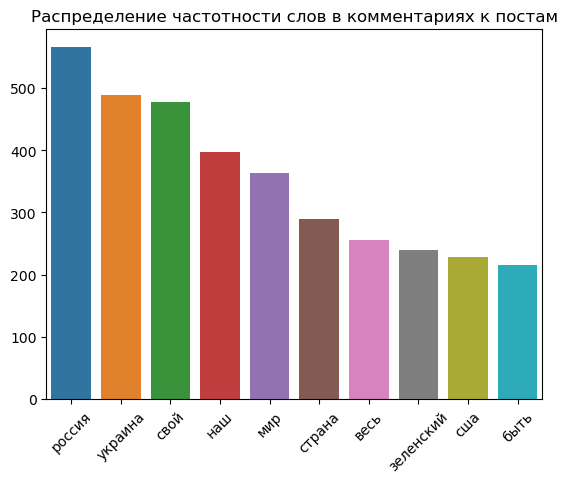

In [44]:
count, words = [], []
for w in all_words_freq_comments.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов в комментариях к постам')
plt.show()

In [73]:
df.to_csv('comments_pure.csv')

In [45]:
df = pd.read_csv('comments_pure.csv',index_col=0)
df.head()

,post_id,comments_text,tokenized,pure_tokens
0,2192593.0,Единственный способ-уничтожить бандеровскую хунту,"['единственный', 'способуничтожить', 'бандеров...","['единственный', 'способуничтожить', 'бандеров..."
2,2192574.0,"Странно, и что, ни разу не сказал""отличные пер...","['странно', 'раз', 'сказалотличный', 'перегово...","['странно', 'раз', 'сказалотличный', 'перегово..."
3,2192574.0,Конечно.если ты террористам продолжаешь постав...,"['конечноести', 'террорист', 'продолжать', 'по...","['конечноести', 'террорист', 'продолжать', 'по..."
4,2192574.0,"Трамп с наскока все хотел решить.( хотя, вряд ...","['трамп', 'наскок', 'хотеть', 'решить', 'хотя'...","['трамп', 'наскок', 'хотеть', 'решить', 'хотя'..."
5,2192555.0,Ужас .. Они там все торчат на кокаине. Не мудр...,"['ужас', 'торчать', 'кокаин', 'мудрено', 'торч...","['ужас', 'торчать', 'кокаин', 'мудрено', 'торч..."


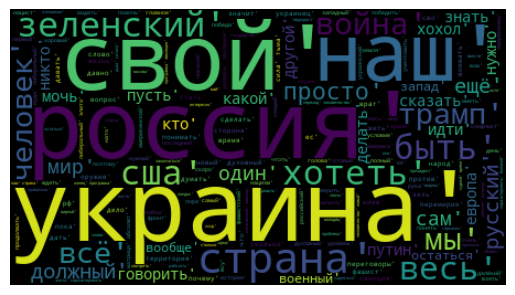

In [46]:
textt = ''.join(w for w in df.pure_tokens)
wordcloud = WordCloud(width=450,height=250).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()